In [100]:
import torch

# Sprawdź, czy CUDA (GPU) jest dostępne
if torch.cuda.is_available():
    print("GPU is avaible.")
else:
    print("non avaible GPU.")

GPU is avaible.


In [101]:
%matplotlib inline

import matplotlib.pyplot as plt
from darts import TimeSeries
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from tqdm.autonotebook import tqdm
from darts.models import TFTModel
from darts import concatenate
from darts.dataprocessing.transformers import Scaler
from pytorch_lightning.callbacks import EarlyStopping
from darts.metrics import mape

In [102]:
df = pd.read_csv("./data/bike.csv")

In [103]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [104]:
df.isnull().values.any()

False

In [105]:
df["datetime"] = pd.to_datetime(df["datetime"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
None


In [106]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [107]:
df['year'] = df['datetime'].dt.year
df['week_day'] = df['datetime'].dt.weekday
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df["hour"] = df["datetime"].dt.hour

In [108]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,week_day,day,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,5,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,5,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,5,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,5,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,5,1,1,4


In [109]:
bike_time = TimeSeries.from_dataframe(df=df, value_cols=["count"], time_col="datetime", freq="H")
bike = TimeSeries.from_dataframe(df=df, value_cols=["count"])

<AxesSubplot: xlabel='time'>

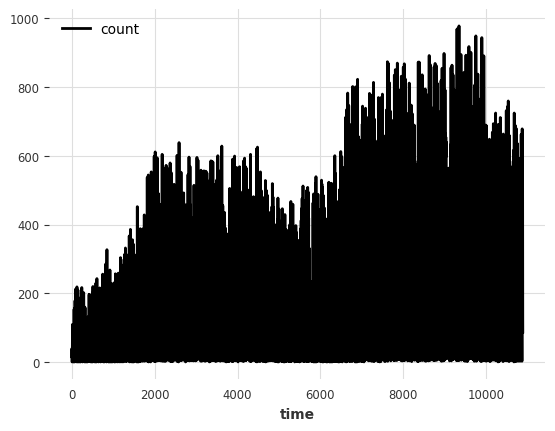

In [110]:
bike.plot()

In [111]:
# hour = datetime_attribute_timeseries(bike_time, attribute="hour")
# day = datetime_attribute_timeseries(bike_time, attribute="day")
# week_day = datetime_attribute_timeseries(bike_time, attribute="weekday")
# month = datetime_attribute_timeseries(bike_time, attribute="month")
# year = datetime_attribute_timeseries(bike_time, attribute="year")

hour = TimeSeries.from_dataframe(df=df, value_cols=["hour"])
day = TimeSeries.from_dataframe(df=df, value_cols=["day"])
week_day = TimeSeries.from_dataframe(df=df, value_cols=["week_day"])
month = TimeSeries.from_dataframe(df=df, value_cols=["month"])
year = TimeSeries.from_dataframe(df=df, value_cols=["year"])


In [112]:
season = TimeSeries.from_dataframe(df=df, value_cols=["season"])
holiday = TimeSeries.from_dataframe(df=df, value_cols=["holiday"])
workingday = TimeSeries.from_dataframe(df=df, value_cols=["workingday"])
weather = TimeSeries.from_dataframe(df=df, value_cols=["weather"])
temp = TimeSeries.from_dataframe(df=df, value_cols=["temp"])
atemp = TimeSeries.from_dataframe(df=df, value_cols=["atemp"])
humidity = TimeSeries.from_dataframe(df=df, value_cols=["humidity"])
windspeed = TimeSeries.from_dataframe(df=df, value_cols=["windspeed"])



In [113]:
future_cov_list = [hour, day, week_day, month,year, holiday, season]
future_cov = concatenate(future_cov_list, axis=1)

<AxesSubplot: xlabel='time'>

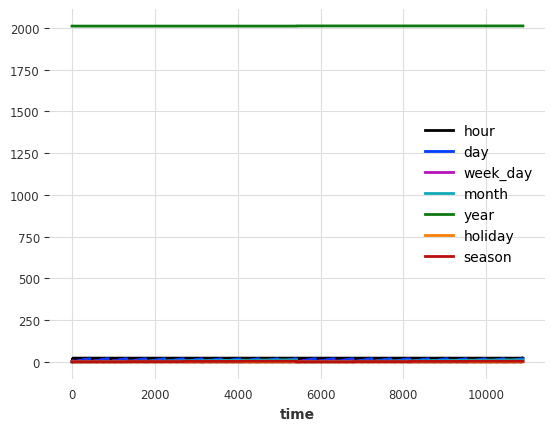

In [114]:
future_cov.plot()

In [115]:
past_cov_list = [season, holiday, workingday, weather, temp, atemp, humidity, windspeed, hour, day, week_day, month,year]
past_cov = concatenate(past_cov_list, axis=1)

In [116]:
len(past_cov_list)

13

In [117]:
scaler = Scaler()

In [118]:
bike_scaled = scaler.fit_transform(bike)
future_cov_scaled = scaler.fit_transform(future_cov)
past_cov_scaled = scaler.fit_transform(past_cov)

Number of components is larger than 10 (13). Plotting only the first 10 components.You can overwrite this in the using the `plot_all_components` argument in plot()Beware that plotting a large number of components may cause performance issues.


<AxesSubplot: xlabel='time'>

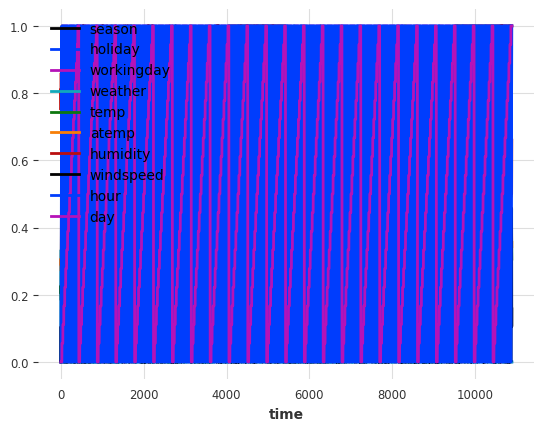

In [119]:
past_cov_scaled.plot()

In [120]:
# podział danych na traningowe i testowe
bike_train, bike_test = bike_scaled.split_before(0.9)
# past_cov_train, past_cov_test = past_cov_scaled.split_before(0.9)
# future_cov_train, future_cov_test = future_cov_scaled.split_before(0.9)

In [121]:
model_name = "bike_model_1"
# my_stopper = EarlyStopping(
#     monitor="val_loss",  # "val_MeanAbsolutePercentageError"
#     patience=5,
#     min_delta=0.05,
#     mode='min',
# )

new_model = TFTModel(
    input_chunk_length=480, # 
    output_chunk_length=120, # 1 week
    add_relative_index=False,
    hidden_size=32,
    lstm_layers=1,
    num_attention_heads=4,
    batch_size=16,
    n_epochs=10,
    dropout=0.1,
    optimizer_kwargs={"lr": 1e-3},
    random_state=42,
    save_checkpoints=True,
    pl_trainer_kwargs={"accelerator": "gpu"},
    model_name=model_name
)

In [122]:
new_model.fit(bike_train, 
              future_covariates=future_cov, 
              past_covariates=past_cov
             )


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3050 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                              | Type                             | Params
----------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0     
1  | val_metrics                       | MetricCollection                 | 0     
2  | input_embeddings                  | _MultiEmbedding                  | 0     
3  | stat

Training: |          | 0/? [00:00<?, ?it/s]

/home/szczepan/anaconda3/envs/time_series/lib/python3.10/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:367: `ModelCheckpoint(monitor='val_loss')` could not find the monitored key in the returned metrics: ['train_loss', 'epoch', 'step']. HINT: Did you call `log('val_loss', value)` in the `LightningModule`?
`Trainer.fit` stopped: `max_epochs=10` reached.


TFTModel(hidden_size=32, lstm_layers=1, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=8, categorical_embedding_sizes=None, add_relative_index=False, loss_fn=None, likelihood=None, norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=480, output_chunk_length=120, batch_size=16, n_epochs=10, optimizer_kwargs={'lr': 0.001}, random_state=42, save_checkpoints=True, pl_trainer_kwargs={'accelerator': 'gpu'}, model_name=bike_model_1)

In [123]:
new_model.save(f"./bike_1.pkl")

In [124]:
pred = new_model.predict(n=len(bike_test), num_samples=100)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

ValueError: The actual series must be strictly positive to compute the MAPE.


ValueError: The actual series must be strictly positive to compute the MAPE.

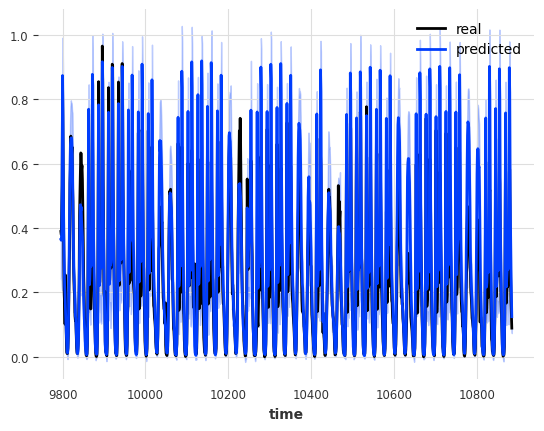

In [126]:
bike_test.plot(label="real")
pred.plot(label="predicted")
print("MAPE = {:.2f}%".format(mape(bike_test, pred)))

MAPE = 42.08%


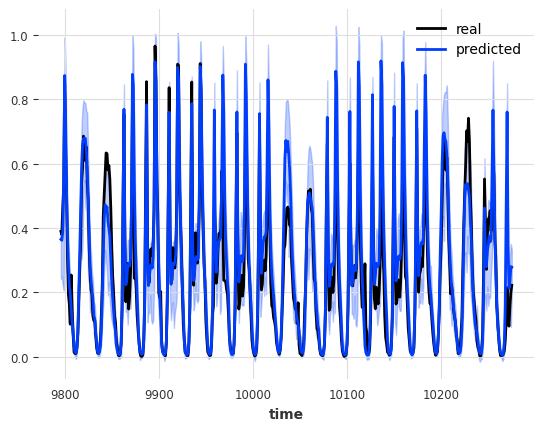

In [130]:
bike_test[:480].plot(label="real")
pred[:480].plot(label="predicted")
print("MAPE = {:.2f}%".format(mape(bike_test[480], pred[480])))

MAPE = 9.99%


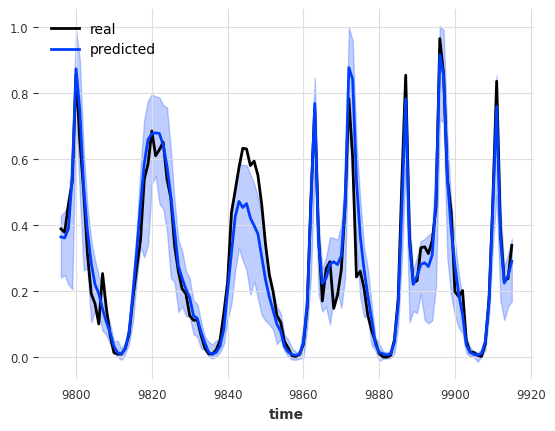

In [134]:
bike_test[:120].plot(label="real")
pred[:120].plot(label="predicted")
print("MAPE = {:.2f}%".format(mape(bike_test[120], pred[120])))

MAPE = 34.25%


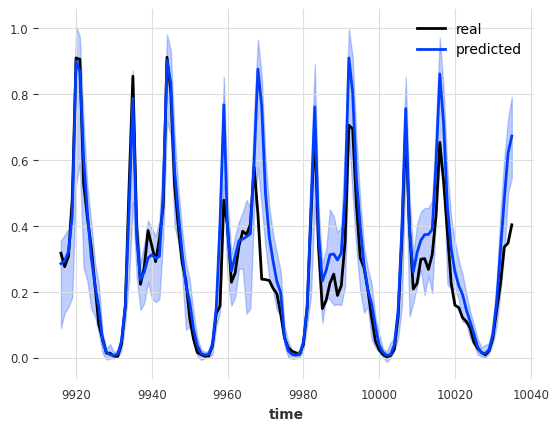

In [135]:
bike_test[120:240].plot(label="real")
pred[120:240].plot(label="predicted")
print("MAPE = {:.2f}%".format(mape(bike_test[120:240], pred[120:240])))

MAPE = 51.61%


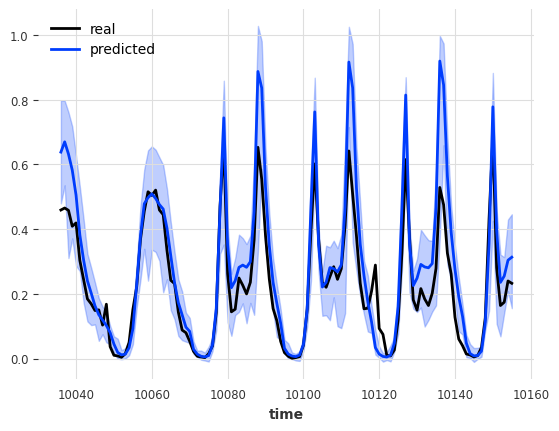

In [136]:
bike_test[240:360].plot(label="real")
pred[240:360].plot(label="predicted")
print("MAPE = {:.2f}%".format(mape(bike_test[240:360], pred[240:360])))